# Tarea 3. Midiendo rendimiento y riesgo en un portafolio.

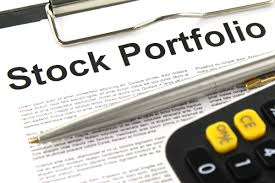

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [2]:
# Importando librerias 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [6]:
tickers = ['^GSPC' , 'MSFT', 'WBA', 'TSLA']
df = yf.download(tickers, start="2015-01-01", end="2023-09-18")['Adj Close'] 
df.head()

[*********************100%%**********************]  4 of 4 completed


,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,40.534840,14.620667,57.365658,2058.199951
2015-01-05,40.162090,14.006000,56.233448,2020.579956
2015-01-06,39.572624,14.085333,56.376850,2002.609985
2015-01-07,40.075397,14.063333,57.818562,2025.900024
2015-01-08,41.254353,14.041333,58.535622,2062.139893


<Axes: xlabel='Date'>

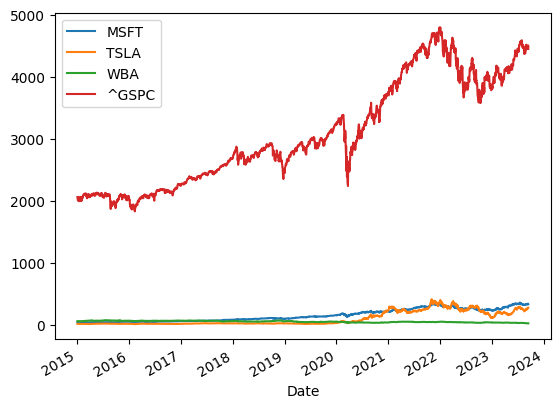

In [18]:
df.plot()

In [20]:
rt_anual = df.pct_change().dropna()
rt_anual 

,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014677,0.005664,0.002550,-0.008893
2015-01-07,0.012705,-0.001562,0.025573,0.011630
2015-01-08,0.029418,-0.001564,0.012402,0.017888
2015-01-09,-0.008405,-0.018802,-0.024242,-0.008404
...,...,...,...,...
2023-09-11,0.010979,0.100925,-0.025466,0.006723
2023-09-12,-0.018258,-0.022297,0.013532,-0.005696
2023-09-13,0.012931,0.014281,0.008287,0.001242


Text(0.5, 1.0, 'Rendimientos')

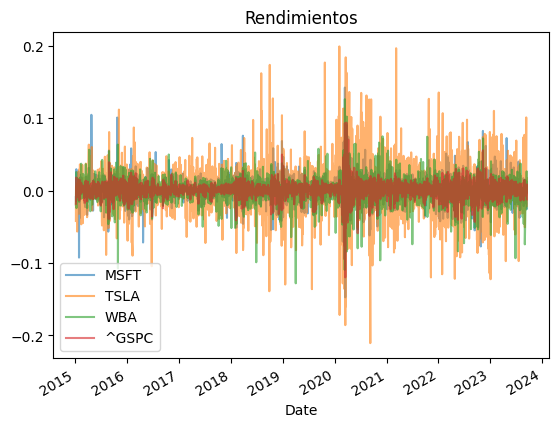

In [24]:
rt_anual.plot(alpha = 0.6)
plt.title('Rendimientos')

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [3]:
tickers2 = ['MSFT', 'WBA', 'TSLA']
df = yf.download(tickers2, start="2015-01-01", end="2023-09-18")['Adj Close'] 
df

[*********************100%%**********************]  3 of 3 completed


,MSFT,TSLA,WBA
Date,,,
2015-01-02,40.534843,14.620667,57.365658
2015-01-05,40.162090,14.006000,56.233452
2015-01-06,39.572624,14.085333,56.376877
2015-01-07,40.075409,14.063333,57.818546
2015-01-08,41.254349,14.041333,58.535610
...,...,...,...
2023-09-11,337.940002,273.579987,21.430000
2023-09-12,331.769989,267.480011,21.719999
2023-09-13,336.059998,271.299988,21.900000


In [10]:
#Valores esperados
rt = df.pct_change().dropna()
df['ve_MSFT'] =  rt['MSFT'].mean()
df['ve_WBA'] =  rt['WBA'].mean()
df['ve_TSLA'] =  rt['TSLA'].mean()

df['vol_MSFT'] =  rt['MSFT'].std()
df['vol_WBA'] =  rt['WBA'].std()
df['vol_TSLA'] =  rt['TSLA'].std()

df


,MSFT,TSLA,WBA,ve_MSFT,ve_WBA,ve_TSLA,vol_MSFT,vol_WBA,vol_TSLA
Date,,,,,,,,,
2015-01-02,40.534843,14.620667,57.365658,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2015-01-05,40.162090,14.006000,56.233452,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2015-01-06,39.572624,14.085333,56.376877,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2015-01-07,40.075409,14.063333,57.818546,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2015-01-08,41.254349,14.041333,58.535610,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
...,...,...,...,...,...,...,...,...,...
2023-09-11,337.940002,273.579987,21.430000,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2023-09-12,331.769989,267.480011,21.719999,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778
2023-09-13,336.059998,271.299988,21.900000,0.001114,-0.000253,0.001978,0.017669,0.018679,0.035778


In [11]:
rt = df.pct_change().dropna()
df['ve_MSFT'] =  rt['MSFT'].mean() *252
df['ve_WBA'] =  rt['WBA'].mean() * 252 
df['ve_TSLA'] =  rt['TSLA'].mean() * 252

df['vol_MSFT'] =  rt['MSFT'].std() * 252 
df['vol_WBA'] =  rt['WBA'].std() * 252 
df['vol_TSLA'] =  rt['TSLA'].std() * 252 

df


,MSFT,TSLA,WBA,ve_MSFT,ve_WBA,ve_TSLA,vol_MSFT,vol_WBA,vol_TSLA
Date,,,,,,,,,
2015-01-02,40.534843,14.620667,57.365658,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2015-01-05,40.162090,14.006000,56.233452,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2015-01-06,39.572624,14.085333,56.376877,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2015-01-07,40.075409,14.063333,57.818546,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2015-01-08,41.254349,14.041333,58.535610,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
...,...,...,...,...,...,...,...,...,...
2023-09-11,337.940002,273.579987,21.430000,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2023-09-12,331.769989,267.480011,21.719999,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965
2023-09-13,336.059998,271.299988,21.900000,0.280766,-0.063866,0.498529,4.452572,4.70704,9.015965


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)